In [4]:
import pandas as pd
from textblob import TextBlob

# Leer el archivo CSV
df = pd.read_csv('twitter_sentiment_data.csv')

# Función para realizar el análisis de sentimientos
def analizar_sentimientos(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    if polaridad > 0:
        return 1  # Sentimiento positivo
    elif polaridad < 0:
        return -1  # Sentimiento negativo
    else:
        return 0  # Sentimiento neutral

# Aplicar la función de análisis de sentimientos a cada tweet
df['sentimiento'] = df['message'].apply(analizar_sentimientos)

# Mostrar el DataFrame con los resultados del análisis de sentimientos
print(df)


       sentiment                                            message  \
0             -1  @tiniebeany climate change is an interesting h...   
1              1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2              1  Fabulous! Leonardo #DiCaprio's film on #climat...   
3              1  RT @Mick_Fanning: Just watched this amazing do...   
4              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...   
...          ...                                                ...   
43938          1  Dear @realDonaldTrump,\nYeah right. Human Medi...   
43939          1  What will your respective parties do to preven...   
43940          2  RT @MikkiL: UN Poll Shows Climate Change Is th...   
43941          0  RT @taehbeingextra: i still can$q$t believe th...   
43942          1  @Likeabat77 @zachhaller \n\nThe wealthy + foss...   

                  tweetid  sentimiento  
0      792927353886371840            1  
1      793124211518832641            1  
2      79312440238883225

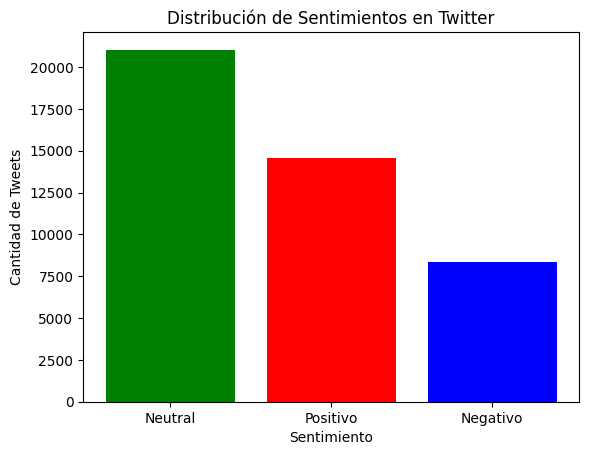

       sentiment                                            message  \
0             -1  @tiniebeany climate change is an interesting h...   
1              1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2              1  Fabulous! Leonardo #DiCaprio's film on #climat...   
3              1  RT @Mick_Fanning: Just watched this amazing do...   
4              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...   
...          ...                                                ...   
43938          1  Dear @realDonaldTrump,\nYeah right. Human Medi...   
43939          1  What will your respective parties do to preven...   
43940          2  RT @MikkiL: UN Poll Shows Climate Change Is th...   
43941          0  RT @taehbeingextra: i still can$q$t believe th...   
43942          1  @Likeabat77 @zachhaller \n\nThe wealthy + foss...   

                  tweetid sentimiento  
0      792927353886371840    Positivo  
1      793124211518832641    Positivo  
2      793124402388832256  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Leer el archivo CSV
df = pd.read_csv('twitter_sentiment_data.csv')

# Función para realizar el análisis de sentimientos
def analizar_sentimientos(texto):
    # Utilizar TextBlob para obtener la polaridad del sentimiento
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity

    # Asignar etiquetas de sentimiento en base a la polaridad
    if polaridad > 0:
        return 'Positivo'
    elif polaridad < 0:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicar la función de análisis de sentimientos a cada tweet
df['sentimiento'] = df['message'].apply(analizar_sentimientos)

# Mostrar la distribución de los sentimientos en un gráfico de barras
sentimiento_counts = df['sentimiento'].value_counts()
plt.bar(sentimiento_counts.index, sentimiento_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.title('Distribución de Sentimientos en Twitter')
plt.show()

# Mostrar el DataFrame con los resultados del análisis de sentimientos
print(df)


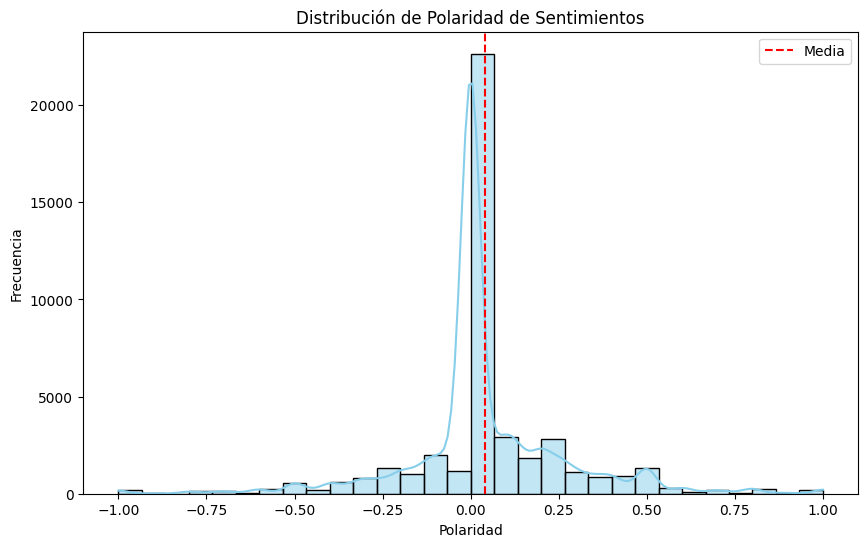

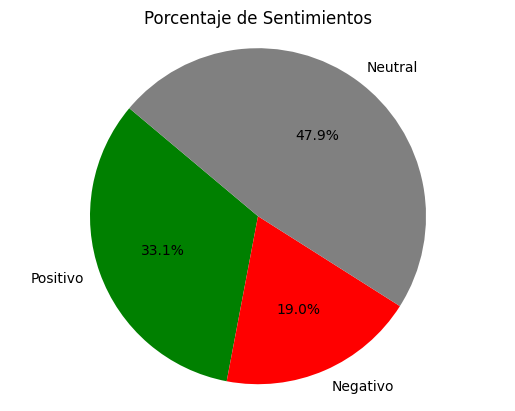

Media de polaridad: 0.039466748135776414
Cantidad de sentimientos positivos: 14557
Cantidad de sentimientos negativos: 8347
Cantidad de sentimientos neutrales: 21039


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Leer el archivo CSV
df = pd.read_csv('twitter_sentiment_data.csv')

# Función para realizar el análisis de sentimientos
def analizar_sentimientos(texto):
    # Utilizar TextBlob para obtener la polaridad del sentimiento
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    return polaridad

# Aplicar la función de análisis de sentimientos a cada tweet
df['polaridad'] = df['message'].apply(analizar_sentimientos)

# Obtener métricas de análisis de sentimientos
media_polaridad = df['polaridad'].mean()
sentimientos_positivos = df[df['polaridad'] > 0]
sentimientos_negativos = df[df['polaridad'] < 0]
sentimientos_neutrales = df[df['polaridad'] == 0]

# Mostrar gráficos
plt.figure(figsize=(10, 6))

# Histograma de polaridad
sns.histplot(data=df, x='polaridad', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Polaridad de Sentimientos')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.axvline(x=media_polaridad, color='red', linestyle='--', label='Media')
plt.legend()
plt.show()

# Gráfico de torta de sentimientos
sizes = [len(sentimientos_positivos), len(sentimientos_negativos), len(sentimientos_neutrales)]
labels = ['Positivo', 'Negativo', 'Neutral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'red', 'gray'], startangle=140)
plt.axis('equal')
plt.title('Porcentaje de Sentimientos')
plt.show()

# Información sobre el análisis de sentimientos
print(f"Media de polaridad: {media_polaridad}")
print(f"Cantidad de sentimientos positivos: {len(sentimientos_positivos)}")
print(f"Cantidad de sentimientos negativos: {len(sentimientos_negativos)}")
print(f"Cantidad de sentimientos neutrales: {len(sentimientos_neutrales)}")


In [11]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimientos VADER
analyzer = SentimentIntensityAnalyzer()

# Función para obtener la polaridad de sentimientos usando VADER
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']

# Ejemplo de uso
text = "I love this product, it's amazing!"
sentiment_score = get_sentiment(text)
print("Polarity Score:", sentiment_score)


Polarity Score: 0.8516


In [13]:
from textblob import TextBlob

# Función para obtener la polaridad de sentimientos usando TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Ejemplo de uso
text = "I hate Mondays, they are so boring."
sentiment_score = get_sentiment(text)
print("Polarity Score:", sentiment_score)


Polarity Score: -0.9


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Datos de ejemplo (X son los textos, y son las etiquetas de sentimiento)
X = ["I love this movie!", "This movie is terrible."]
y = ["positive", "negative"]

# Construir y entrenar el modelo
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X, y)

# Función para predecir el sentimiento de un texto dado
def predict_sentiment(text):
    return model.predict([text])[0]

# Ejemplo de uso
text = "I really enjoyed the new book."
sentiment = predict_sentiment(text)
print("Predicted Sentiment:", sentiment)


Predicted Sentiment: negative


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimientos VADER
analyzer = SentimentIntensityAnalyzer()

# Analizar el sentimiento de una oración de ejemplo
sentence = "This movie is fantastic!"
sentiment_score = analyzer.polarity_scores(sentence)

# Imprimir el resultado del análisis de sentimientos
print(sentiment_score)


{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5983}


In [20]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Cargar el conjunto de datos de tweets
data = pd.read_csv("twitter_sentiment_data.csv")

# Inicializar el analizador de sentimientos VADER
analyzer = SentimentIntensityAnalyzer()

# Aplicar el análisis de sentimientos a cada tweet
sentiment_scores = []
for tweet in data['message']:
    sentiment_score = analyzer.polarity_scores(tweet)
    sentiment_scores.append(sentiment_score)

# Agregar los resultados del análisis al DataFrame original
data['vader_sentiment'] = sentiment_scores

# Imprimir los primeros tweets con sus puntuaciones de sentimiento
print(data[['message', 'vader_sentiment']].head())


                                             message  \
0  @tiniebeany climate change is an interesting h...   
1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2  Fabulous! Leonardo #DiCaprio's film on #climat...   
3  RT @Mick_Fanning: Just watched this amazing do...   
4  RT @cnalive: Pranita Biswasi, a Lutheran from ...   

                                     vader_sentiment  
0  {'neg': 0.078, 'neu': 0.634, 'pos': 0.287, 'co...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'comp...  
3  {'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compou...  
4  {'neg': 0.143, 'neu': 0.757, 'pos': 0.1, 'comp...  


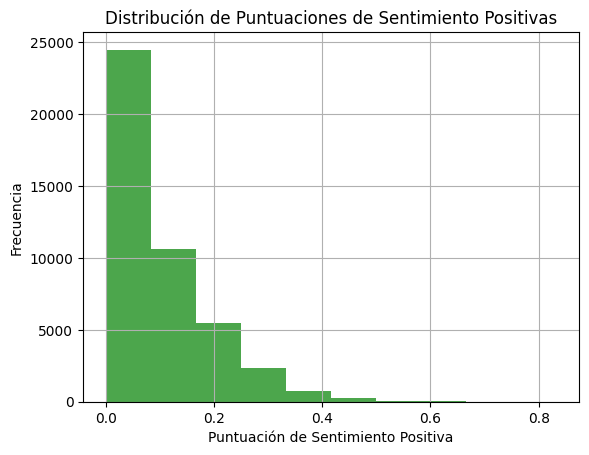

In [21]:
import matplotlib.pyplot as plt

# Extraer las puntuaciones de sentimiento positivas
positive_scores = [score['pos'] for score in sentiment_scores]

# Graficar el histograma de las puntuaciones de sentimiento positivas
plt.hist(positive_scores, bins=10, color='green', alpha=0.7)
plt.title('Distribución de Puntuaciones de Sentimiento Positivas')
plt.xlabel('Puntuación de Sentimiento Positiva')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
